**What is Feature Selection?**
 
        Feature selection is the process of choosing the most important features (variables) from a dataset to improve a machine learning model's performance and efficiency. Instead of using all the features, we select only the most relevant ones that contribute significantly to predictions.

**Why Do We Need Feature Selection?**

*1.Reduces Overfitting 📉*
 
        Too many irrelevant features can make a model complex and cause it to overfit the training data.
*2.Improves Model Performance 🚀*
 
        Selecting relevant features boosts accuracy and reduces unnecessary noise in the data.
*3.Reduces Training Time ⏳*
 
        Fewer features mean faster model training and lower computational cost.
*4.Enhances Interpretability 🔍*
 
        Helps in understanding which features actually impact predictions.



**Types of Feature Selection Methods**

<ins>*Type => Filter Methods:*</ins>
 
Method => Correlation, Chi-Square, Mutual Information.
 
Description => Rank features based on statistical tests.
 
<ins>*Type => Wrapper Methods:*</ins>
 
Method => Forward/Backward Selection, Recursive Feature Elimination (RFE)
 
Description => Train models with different feature subsets and select the best.

<ins>*Type => Embedded Methods*</ins>
 
Method =>Lasso Regression, Decision Trees
 
Description =>Feature selection is built into the model training process.
 

In [4]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#step 1:create a sample dataset
np.random.seed(42)
data=pd.DataFrame({
    'Size':np.random.randint(1000,5000,100),
    'Bedrooms':np.random.randint(1,5,100),
    'Age':np.random.randint(1,50,100),
    'Price':np.random.randint(100000,500000,100)
})

In [6]:
data.head()

,Size,Bedrooms,Age,Price
0,4174,2,32,486393
1,4507,2,39,134754
2,1860,4,49,326814
3,2294,2,32,337714
4,2130,2,4,242483


In [7]:
data.tail()

,Size,Bedrooms,Age,Price
95,2129,2,16,469599
96,4843,4,29,236672
97,4893,1,3,325732
98,2500,3,20,455323
99,1702,3,36,271836


### filter method

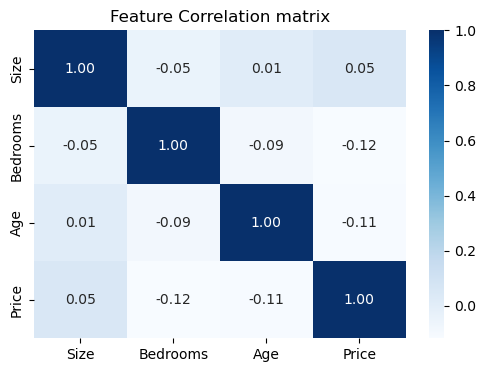

In [10]:
#step 2:compute correlation(filter method)
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),annot=True,cmap='Blues',fmt='.2f')
plt.title("Feature Correlation matrix")
plt.show()

### Wrapper Method

In [11]:
#step 3:apply recursive feature elimination (wrapper method)
X=data.drop(columns=['Price'])
y=data['Price']

model=RandomForestRegressor()
rfe=RFE(model,n_features_to_select=2)
X_selectred=rfe.fit_transform(X,y)

print("Selected Features using RFE :",X.columns[rfe.support_])


Selected Features using RFE : Index(['Size', 'Age'], dtype='object')


### Embedded Method

In [12]:
#STEP 4 :Apply LASSO (least Absolute Shrinkage and Selection Operator)Regression (Embedded Method)
lasso=Lasso(alpha=0.1)
lasso.fit(X,y)
importance=np.abs(lasso.coef_)

selected_features=X.columns[importance>0]
print("Selected features using lasso:",selected_features)

Selected features using lasso: Index(['Size', 'Bedrooms', 'Age'], dtype='object')


**What is Feature Engineering?**
 
            Feature engineering is the process of creating new features or modifying existing ones to improve the performance of machine learning models. It involves techniques like feature extraction, transformation, encoding, and scaling to make data more useful for predictions.
 
**Why Do We Need Feature Engineering?**
 
1.**Improves Model Performance** – Good features help models make better predictions.
 
2.**Reduces Overfitting** – Helps eliminate noise and irrelevant data.
 
3.**Handles Missing Data** – Creates meaningful replacements for missing values.
 
4.**Enables Better Interpretability** – Makes features more understandable and useful.

5.**Reduces Dimensionality** – Helps remove unnecessary data points, making the model efficient.
 

In [16]:
import pandas as pd

df=pd.DataFrame({'TransactionDate':pd.to_datetime(['2025-02-05 14:30:00','2025-02-06 18:45:00'])})

df['DayOfWeek']=df['TransactionDate'].dt.dayofweek
df['Hour']=df['TransactionDate'].dt.hour
df['Isweekend']=df['DayOfWeek'].apply(lambda x:1 if x>=5 else 0)

print(df)

      TransactionDate  DayOfWeek  Hour  Isweekend
0 2025-02-05 14:30:00          2    14          0
1 2025-02-06 18:45:00          3    18          0


In [20]:
#aggregated features
#find average transcation amount per user:

df_trans=pd.DataFrame({
    'UserId':[101,102,101,103,102],
    'TransactionAmount':[500,300,700,1000,400]
})

df_user_Avg=df_trans.groupby('UserId')['TransactionAmount'].mean().reset_index()
df_user_Avg.rename(columns={"TransactionAmount":'AvgTransactionAmount'},inplace=True)
print(df_user_Avg)

   UserId  AvgTransactionAmount
0     101                 600.0
1     102                 350.0
2     103                1000.0


In [22]:
#Encoding Categorical variables

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

df = pd.DataFrame({'ProductCategory': ['Electronics', 'Clothing', 'Grocery', 'Medicines']})

encoder = OneHotEncoder(sparse_output=False)

encoded_features = encoder.fit_transform(df[['ProductCategory']])

df_encoded = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())

print(df_encoded)


   ProductCategory_Clothing  ProductCategory_Electronics  \
0                       0.0                          1.0   
1                       1.0                          0.0   
2                       0.0                          0.0   
3                       0.0                          0.0   

   ProductCategory_Grocery  ProductCategory_Medicines  
0                      0.0                        0.0  
1                      0.0                        0.0  
2                      1.0                        0.0  
3                      0.0                        1.0  


In [24]:
#Log transformation for skewed Data

import numpy as np 
df=pd.DataFrame({'TransactionAmount':[100,200,5000,10000,20000]})
df['LogTransactionAmount']=np.log1p(df['TransactionAmount'])
print(df)

   TransactionAmount  LogTransactionAmount
0                100              4.615121
1                200              5.303305
2               5000              8.517393
3              10000              9.210440
4              20000              9.903538


### Feature Scaling

In [27]:
#Feature Scaling

from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler=MinMaxScaler()
df['NormalizedTransAmount']=scaler.fit_transform(df[['TransactionAmount']])
standard_scaler=StandardScaler()
df['StandardizedTransAmount']=standard_scaler.fit_transform(df[['TransactionAmount']])
print(df)

   TransactionAmount  LogTransactionAmount  NormalizedTransAmount  \
0                100              4.615121               0.000000   
1                200              5.303305               0.005025   
2               5000              8.517393               0.246231   
3              10000              9.210440               0.497487   
4              20000              9.903538               1.000000   

   StandardizedTransAmount  
0                -0.937070  
1                -0.923606  
2                -0.277351  
3                 0.395831  
4                 1.742196  


**Final Summary of Feature Engineering & Imbalanced Data Handling**
 
Feature Extraction : Extract new insights from raw data (e.g., Hour, DayOfWeek)
 
Aggregated Features : Calculate meaningful statistics (e.g., AvgTransactionAmountPerUser)
 
Encoding : Convert categorical variables into numerical (One-Hot Encoding)
 
Log Transformation : Reduce skewness in data distribution
 
Feature Scaling : Normalize numerical features for better model performance
 
Downsampling: Reduce the size of the majority class
 
Upsampling : Increase the size of the minority class
 
SMOTE(Synthetic Minority Over-sampling Technique) : Generate synthetic samples for the minority class